<a href="https://colab.research.google.com/github/JuuliJ/Machine-learning-and-deep-neural-networks/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9D%D0%A1_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание №1
Определение тональности отзывов на фильмы с сайта IMDB
- IMDB обзоры фильмов классификация настроений
- Dataset состоит из 2х кортежей:
x_train, x_test: список последовательностей, которые являются списками индексов (целых чисел). Каждый из наборов данных состоят из 25 000 обзоров фильмов из IMDB, с указанием тональности (положительным/отрицательным). Обзоры были предварительно обработаны, и каждый обзор кодируется как последовательность индексов слов (целых чисел). Для удобства слова индексируются по общей частоте в наборе данных, так что, например, целое число " 3 " кодирует 3-е наиболее частое слово в данных.
- Как правило, "0" не обозначает конкретное слово, а вместо этого используется для кодирования любого неизвестного слова.
y_train, y_test: список целых меток (1 - положительная или 0 - отрицательная тональность).

Раскодируем сообщения

Служебные коды:  
0 - символ заполнитель  
1 - начало последовательности  
2 - неизвестное слово  

#Задание
- 1) Обучить нейронную сеть (Dense и SimpleRNN) подобрав структуру для классифиувции тональности отзывов.
-2) Сравнить результат их работы на тестовой выборке.
-3) Выбрать два отзыва с сайта https://www.imdb.com/ к любым фильмам. Один отрицательный и один положительный.
-4) Подготовить данные и протестировать на нейронных сетях.

# В отчет
- программа
-структуры сетей
- графики обучения
- адрес с выбранными для тестирования отзывами 
- код и результат тестирования выбранных отзывов

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.models import Sequential #тип модели НС
from tensorflow.keras.layers import Dense, Flatten, Embedding, SimpleRNN #библиотеки слоев
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

## Загружаем данные

Данные подготовлены для максимального количества слов 20000.

In [ ]:
num_words=20000

In [ ]:
#загружаем набор данных. в кортеже для обучения 25000 данных, в кортеже для тестирования - 25000 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
len(x_train[5])

43

## Просмотр данных

In [ ]:
index = 6
print(x_train[index])
print(y_train[index])

[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
1


In [ ]:
# загрузка словаря, где ключи - слова, а значения - частота использования слова
word_index = imdb.get_word_index()

In [ ]:
word_index 

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
#подготовка обратного словаря, где ключи - частота использования слова, а значения - слова
reverse_word_index = {}
for key, value in word_index.items(): #получение пары "ключ-значение" на каждую итерацию
  reverse_word_index[value] = key #получаем обратный словарь

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
reverse_word_index[2]

'and'

In [ ]:
reverse_word_index[34701]

'fawn'

In [ ]:
index = 6
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?') #метод get-получение значений из словаря по ключу, при этом если ключ не существует, то ставится ?
    message += word + ' ' #получаем строку, которая соответствует кодовой строке
print(x_train[index])
message

[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]


"? lavish production values and solid performances in this straightforward adaption of jane austen's satirical classic about the marriage game within and between the classes in provincial 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results "

In [ ]:
y_train[index]

1

## Подготовка данных для нейронной сети

In [ ]:
maxlen = 200 #устанавливаем единый размер строки в 200 символов

In [ ]:
len(x_train[6])

123

In [ ]:
print(x_train[6])

[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]


In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen) #преобразование входного списка в двумерный тензор (матрицу) длинной 200
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train.shape, y_test.shape

((25000, 200), (25000,))

In [ ]:
len(x_train[6])

200

In [ ]:
print(x_train[6])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     1  6740   365  1234     5  1156   354
    11    14  5327  6638     7  1016 10626  5940   356    44     4  1349
   500   746     5   200     4  4132    11 16393  9363  1117  1831  7485
     5  4831    26     6     2  4183    17   369    37   215  1345   143
     2     5  1838     8  1974    15    36   119   257    85    52   486
     9     6     2  8564    63   271     6   196    96   949  4121     4
     2     7     4  2212  2436   819    63    47    77  7175   180     6
   227    11    94  2494     2    13   423     4   

## Создание нейронной сети

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Создание Embedding слоя с 20000 словами в словаре, с размерностью векторного пространства равной 30 и размер входного вектора = 300
model.add(Embedding(num_words, 50, input_length=maxlen))
model.add(Flatten()) #Слой Flatten делает входящий тензор данных линейным, т.е. преобразует массив из 3х осей в массив из 1ой оси
model.add(Dense(5)) #Полносвязный слой Dense
#один выходной нейрон с функцией активацией sigmoid, который выводит вероятность принадлежности к классу 1 (позитивный отзыв) или 0 (негативный отзыв).
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = Sequential()
model.add(Embedding(num_words, 50, input_length=maxlen))
model.add(SimpleRNN(50)) #рекуррентный слой на 50 нейронов
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Выберем rmsprop в качестве оптимизатора, функцию потерь binary_crossentropy
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) #Список метрик для мониторинга

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=128, #Обучаем разбив данные на "пакеты" размером batch_size 
                    epochs=2,
                    validation_split=0.1)

Epoch 1/2
176/176 [==============================] - 17s 91ms/step - loss: 0.5650 - accuracy: 0.6942 - val_loss: 0.8215 - val_accuracy: 0.6116
Epoch 2/2
176/176 [==============================] - 16s 92ms/step - loss: 0.3398 - accuracy: 0.8612 - val_loss: 0.3661 - val_accuracy: 0.8408


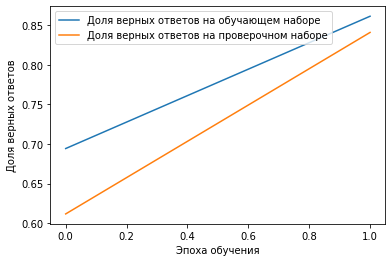

In [ ]:
#Графические представления точности обучения
#Возвращаемый объект "history" содержит записи значений потерь и метрик во время обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Распознаем данные из тестового набора

In [ ]:
#Оцениваем качество обучения сети на тестовых данных, используя "evaluate"
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 84.76%


In [ ]:
#Сгенерируем прогнозы (вероятности - выходные данные последнего слоя) на новых данных с помощью "predict"
predictions = model.predict(x_test)

In [ ]:
predictions[:5] #Генерируем прогнозы для 5 образцов

array([[0.42157048],
       [0.93092304],
       [0.20883715],
       [0.33062673],
       [0.9582859 ]], dtype=float32)

Округляем до 0 или 1

In [ ]:
predictions = predictions.round()

In [ ]:
predictions[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Интерстеллар
# https://www.imdb.com/title/tt0816692/?ref_=tt_urv
test = '''Christopher Nolan directed this sprawling, ambitious science fiction film set in the near-future that stars Mathew McConaughey as a pilot turned farmer named Cooper, forced into that life when famine and blight ravage the earth, compelling humankind to turn away from exploration, even concocting revisionist history that gets his daughter Murphy in trouble at school, but soon their lives will be dramatically altered when he is recruited in a top secret mission headed by Dr. Brand(played by Michael Caine) which will see him team up with Brand's daughter(played by Anne Hathaway) on a dangerous mission into a wormhole that just may save the human race, if they make it back in time...

Big ideas at work here, and Nolan's direction is superb, as are the performances, though this story doesn't seem to know when to quit, becoming a bit far-fetched at the climax, but still remains an impressive endeavor nonetheless.

Will require multiple viewings.'''

In [ ]:
# Джуманджи:Новый уровень (2019)
# https://www.imdb.com/title/tt7975244/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=2413b25e-e3f6-4229-9efd-599bb9ab1f97&pf_rd_r=Z0J3RYPCBA2BCZ579RD0&pf_rd_s=right-2&pf_rd_t=15061&pf_rd_i=homepage&ref_=hm_otw_t0
test = '''This is a fun movie for the family and kids. However they missed an opportunity to make a great movie. Character flaws, continuity errors and Deus ex machina really ruin the movie for me.

I thought that the movie had a good plot good cinematography but the direction and the script failed to maintain a level of quality.

The ending was anti-climatic and dull.'''

In [ ]:
# Замок к Рождеству
# https://www.imdb.com/title/tt13070602/?ref_=fn_al_tt_1
test = '''The story of a recently single female American writer who travels to Ireland and meets a down-to-earth castle-owning Scottish Duke played by Craig Ferguson.. Oh wait.. That's "Then Came You".

Let's try this again!

A Castle for Christmas is basically what happens twelve months after Mary Lambert sees "Then Came You" and thinks what if the movie was set in Christmas and the duke was played by Cary Elwes with a fake Scottish accent instead of Scotsman Craig Ferguson?

The two movies are almost identical and although the acting in A Castle for Christmas is slightly better, I have a preference for Then Came You because Craig Ferguson made the Duke's character much more loveable.'''

In [ ]:
# Круэлла
# https://www.imdb.com/title/tt3228774/?ref_=tt_urv
test = '''Patton Oswalt once famously yelled of the Star Wars prequels, "I DON'T GIVE A **** WHERE THE STUFF I LOVE COMES FROM! I JUST LOVE THE STUFF I LOVE!" This was in a time before movies like Joker took the villains from our favorite old films and made them someone that we could care about and perhaps even come to love.

To wit: the only thing I know about Cruella de Vil from One Hundred and One Dalmations is that she's fixated on murdering, well, a hundred and one little dalmatians just so she can get a new coat. That really doesn't sound like someone I want to know more about, but here we are with a movie with a MAC cosmetics tie-in and an anti-heroine that can pretty be Arthur Fleck for the Hot Topic set.

Craig Gillespie comes from advertising into directing and it shows, as he's great at breaking this movie into set pieces that have very unique looks. His films are hit and miss with me. I was fine with I, Tonya but his Fright Night is an abomination. Here, he's making a decent movie, albeit one that is two hours and fourteen minutes, which seems about twice as long as this movie needs ot be. Imagine if I had the attention span of a child! Oh wait, I do!

Did you ever wonder how Cruella met her henchmen Jasper and Horace? Were you lying awake at night wondering who her mother was and just why she hated dalmatians so much?

Probably you were, if you watched this. This film was enjoyed in our home because there was a dog named Wink who was a chihuahua and we all know how much those tiny yet feisty beasts are beloved in the B&S About Movies HQ.

I guess if you have kids and you want to introduce them to popular music, this is a decent movie to do so. I'm still failing to see any reason for why it exists, but I could say that about so many of the sequels and remakes and reimaginings that I find myself watching.'''

In [ ]:
# re.sub(pattern, repl, string, max=0)
# метод заменяет все вхождения pattern в string на repl, если не указано на max. Он возвращает измененную строку.
import re
test = re.sub('[,.\n]', ' ', test)

In [ ]:
test = test.lower() #Преобразует все символы верхнего регистра в строке в символы нижнего регистра и возвращает их.

In [ ]:
test

'this is a fun movie for the family and kids  however they missed an opportunity to make a great movie  character flaws  continuity errors and deus ex machina really ruin the movie for me   i thought that the movie had a good plot good cinematography but the direction and the script failed to maintain a level of quality   the ending was anti-climatic and dull '

In [ ]:
test = test.split(' ') #Pазбивает строку по указанному разделителю и возвращает список строк

In [ ]:
test

['this',
 'is',
 'a',
 'fun',
 'movie',
 'for',
 'the',
 'family',
 'and',
 'kids',
 '',
 'however',
 'they',
 'missed',
 'an',
 'opportunity',
 'to',
 'make',
 'a',
 'great',
 'movie',
 '',
 'character',
 'flaws',
 '',
 'continuity',
 'errors',
 'and',
 'deus',
 'ex',
 'machina',
 'really',
 'ruin',
 'the',
 'movie',
 'for',
 'me',
 '',
 '',
 'i',
 'thought',
 'that',
 'the',
 'movie',
 'had',
 'a',
 'good',
 'plot',
 'good',
 'cinematography',
 'but',
 'the',
 'direction',
 'and',
 'the',
 'script',
 'failed',
 'to',
 'maintain',
 'a',
 'level',
 'of',
 'quality',
 '',
 '',
 'the',
 'ending',
 'was',
 'anti-climatic',
 'and',
 'dull',
 '']

Кодируем текст

In [ ]:
coded_text = [1] #кодовый вектор, начинающийся со значения 1-начала строковой последовательности

In [ ]:
for word in test:
    if word != '': #если слово не пустое
        word_code = word_index.get(word, 2) #то этому слову сопоставляется код из словаря, если в словаре нет такого слова, то ставится код 2
        if word_code > num_words: #если код слова больше, чем максимальный возможный код (num_words=20000) из словаря
            word_code = 2 #то присвоить код равный 2
        if word_code != 2: 
          word_code += 3  #сдвигаем код на 3 значения
        coded_text.append(word_code) #добавляет элемент в конец списка
        

In [ ]:
print(coded_text)

[1, 14, 9, 6, 253, 20, 18, 4, 223, 2, 362, 190, 36, 1049, 35, 1434, 8, 97, 6, 87, 20, 109, 1508, 2386, 4013, 2, 11687, 1233, 16203, 66, 2457, 4, 20, 18, 72, 13, 197, 15, 4, 20, 69, 6, 52, 114, 52, 627, 21, 4, 458, 2, 4, 229, 1196, 8, 4560, 6, 651, 7, 489, 4, 277, 16, 2, 2, 753, 14, 9, 6, 253, 20, 18, 4, 223, 2, 362, 190, 36, 1049, 35, 1434, 8, 97, 6, 87, 20, 109, 1508, 2386, 4013, 2, 11687, 1233, 16203, 66, 2457, 4, 20, 18, 72, 13, 197, 15, 4, 20, 69, 6, 52, 114, 52, 627, 21, 4, 458, 2, 4, 229, 1196, 8, 4560, 6, 651, 7, 489, 4, 277, 16, 2, 2, 753]


Преобразуем текст в массив numpy

In [ ]:
x = np.array(coded_text)

In [ ]:
x.shape

(129,)

In [ ]:
x

array([    1,    14,     9,     6,   253,    20,    18,     4,   223,
           2,   362,   190,    36,  1049,    35,  1434,     8,    97,
           6,    87,    20,   109,  1508,  2386,  4013,     2, 11687,
        1233, 16203,    66,  2457,     4,    20,    18,    72,    13,
         197,    15,     4,    20,    69,     6,    52,   114,    52,
         627,    21,     4,   458,     2,     4,   229,  1196,     8,
        4560,     6,   651,     7,   489,     4,   277,    16,     2,
           2,   753,    14,     9,     6,   253,    20,    18,     4,
         223,     2,   362,   190,    36,  1049,    35,  1434,     8,
          97,     6,    87,    20,   109,  1508,  2386,  4013,     2,
       11687,  1233, 16203,    66,  2457,     4,    20,    18,    72,
          13,   197,    15,     4,    20,    69,     6,    52,   114,
          52,   627,    21,     4,   458,     2,     4,   229,  1196,
           8,  4560,     6,   651,     7,   489,     4,   277,    16,
           2,     2,

In [ ]:
x = np.expand_dims(x, axis=0) #Добавление оси, чтобы соблюсти формат

In [ ]:
x

array([[    1,    14,     9,     6,   253,    20,    18,     4,   223,
            2,   362,   190,    36,  1049,    35,  1434,     8,    97,
            6,    87,    20,   109,  1508,  2386,  4013,     2, 11687,
         1233, 16203,    66,  2457,     4,    20,    18,    72,    13,
          197,    15,     4,    20,    69,     6,    52,   114,    52,
          627,    21,     4,   458,     2,     4,   229,  1196,     8,
         4560,     6,   651,     7,   489,     4,   277,    16,     2,
            2,   753,    14,     9,     6,   253,    20,    18,     4,
          223,     2,   362,   190,    36,  1049,    35,  1434,     8,
           97,     6,    87,    20,   109,  1508,  2386,  4013,     2,
        11687,  1233, 16203,    66,  2457,     4,    20,    18,    72,
           13,   197,    15,     4,    20,    69,     6,    52,   114,
           52,   627,    21,     4,   458,     2,     4,   229,  1196,
            8,  4560,     6,   651,     7,   489,     4,   277,    16,
      

In [ ]:
x.shape

(1, 129)

In [ ]:
x = pad_sequences(x, maxlen=maxlen) #Усечение последовательности до maxlen

In [ ]:
predictions = model.predict(x)
print(predictions)
predictions.round()

[[0.01698831]]


array([[0.]], dtype=float32)